In [1]:
import numpy as np
import torch
import random
import pandas as pd
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:64'

import utils

%load_ext autoreload
%autoreload 2

/Users/paul/anaconda3/envs/acd/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Global variable model:

model_name = 'openai-community/gpt2' #"openai-community/gpt2-xl" #"meta-llama/Llama-2-7b-hf" #openai-community/gpt2-xl 'microsoft/Phi-3-mini-4k-instruct
dataset_path = 'datasets/ilikecats_20000.csv' #'datasets/(non)animal_2000_gpt-4-turbo.csv'

# # Load model and dataset
# model = utils.LinearFeatureWrapper(model_name, dataset_path, 'Animal', 'Non-Animal', True)
model_hf = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype = 'auto',  trust_remote_code=True)
tokenizer_hf = AutoTokenizer.from_pretrained(model_name)
layers = model_hf.transformer.h
# model.set_model_tokenizer(model_hf, tokenizer_hf)
# model.set_layers(model.model.transformer.h) # Depends on model! Typically model.model.model.layers. For gpt2: model.model.transformer.h

In [19]:
dataset_size = 64

dataset = utils.Dataset()
dataset.load_data(dataset_path, 'Animal', 'Non-Animal')
pos_dataset, neg_dataset = dataset.get_pos_neg_dataset(dataset_size)

In [20]:
model = utils.LinearFeatureWrapper(model_hf, tokenizer_hf, layers, pos_dataset, neg_dataset)

In [21]:
model.get_pos_neg_activations()

Processing batch 1/2


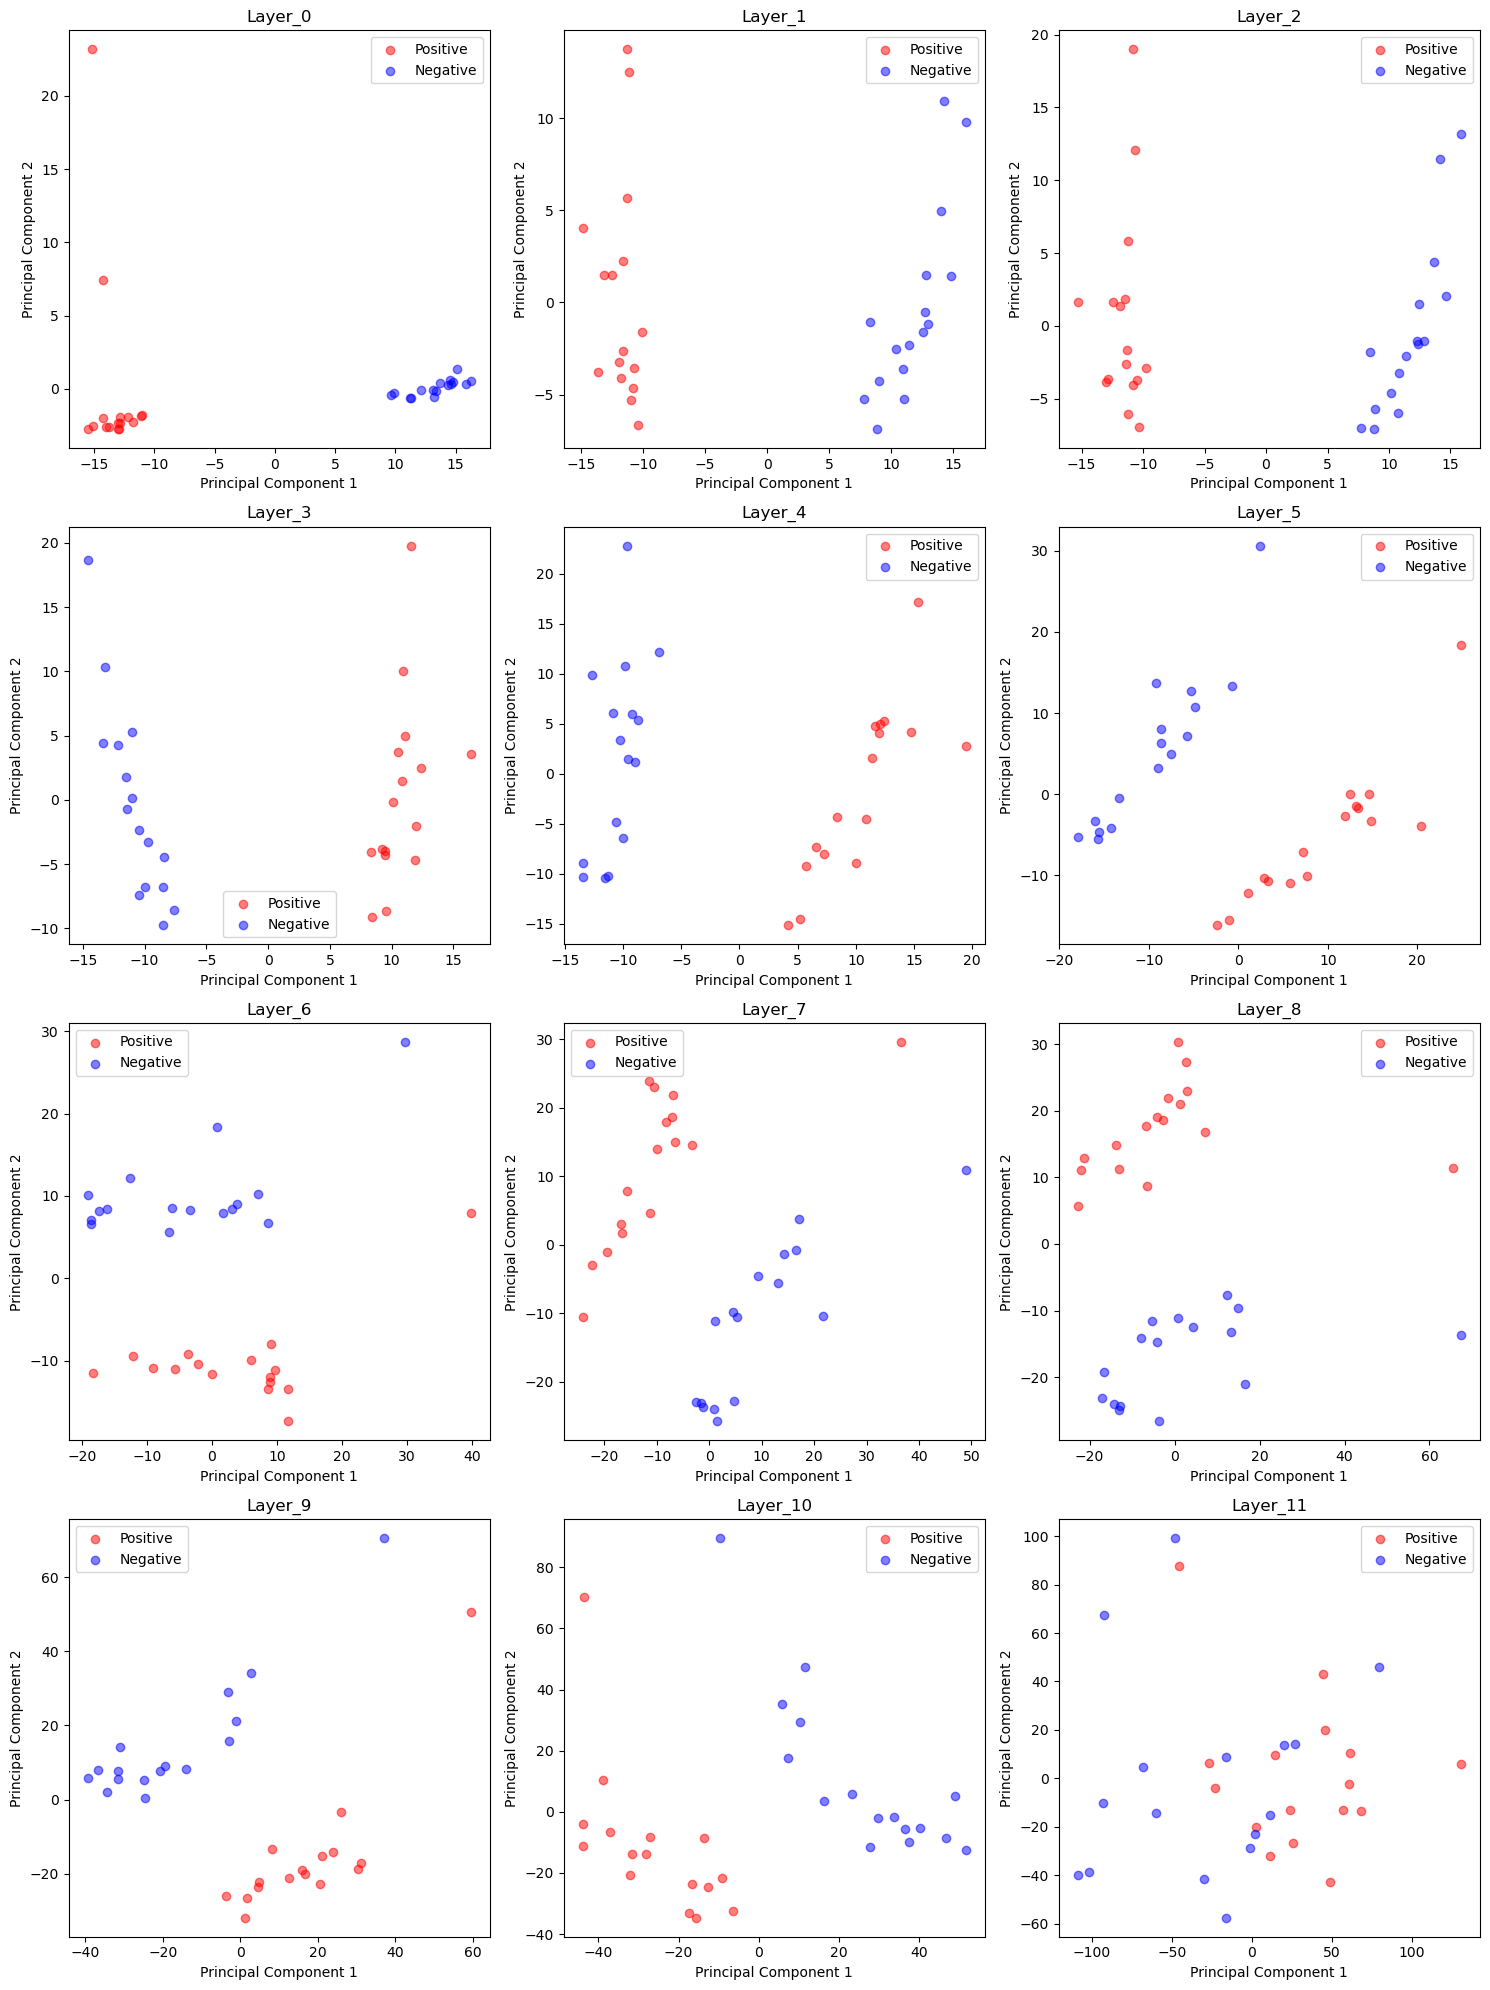

In [ ]:
model.plot_pca()